# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [1]:
import pandas as pd
import numpy as np

In [2]:
meta = pd.read_csv('./data/mini.csv')
meta

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [3]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [5]:
meta.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


## 유저들의 학습 패턴 파악하기

온라인 학습 플랫폼의 유저들은 배움에 대한 의지가 있어 돈을 지불하고 강의를 수강합니다.  
제로 베이스에서 배움을 시작하는 유저도 있고, 기본 지식이 있는 상태에서 서비스를 이용하는 유저도 있습니다.  
유저들의 선호도와 학습 성취 사이에 어떤 연관이 있는지 살펴보겠습니다.  

In [24]:
learning_level = meta[['user_id', 'average_time_per_learning_session', 'total_completed_courses', 'recent_learning_achievement', 'abandoned_learning_sessions', 'preferred_difficulty_level', 'target']]
learning_level

,user_id,average_time_per_learning_session,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,preferred_difficulty_level,target
0,b919c29d,8.427187,16,68.360455,3,Low,0
1,a0a60abb,72.646087,13,97.567322,2,Medium,1
2,b9f171ae,21.774492,14,94.358763,3,Medium,1
3,5dc0ba8b,42.659066,18,70.153228,0,Low,1
4,65c83654,30.744287,10,81.917908,2,Medium,1
...,...,...,...,...,...,...,...
9995,ae6b76bc,84.053558,16,64.966803,2,Low,1
9996,24588752,45.464833,8,82.750244,3,Medium,1
9997,e4622a54,127.302411,14,81.567839,3,High,1
9998,e07fbad9,5.297234,10,89.885656,4,Low,1


선호하는 난이도 별 최근 학습 성취도를 보겠습니다.  
최근 학습 성취도를 저, 중, 고 세 구간으로 나누었습니다.

In [25]:
learning_level['recent_learning_achievement_level'] = pd.qcut(learning_level['recent_learning_achievement'], 3, labels=['저', '중', '고'])

C:\Users\n2465\AppData\Local\Temp\ipykernel_37628\3823180802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  learning_level['recent_learning_achievement_level'] = pd.qcut(learning_level['recent_learning_achievement'], 3, labels=['저', '중', '고'])


In [26]:
learning_level

,user_id,average_time_per_learning_session,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,preferred_difficulty_level,target,recent_learning_achievement_level
0,b919c29d,8.427187,16,68.360455,3,Low,0,저
1,a0a60abb,72.646087,13,97.567322,2,Medium,1,고
2,b9f171ae,21.774492,14,94.358763,3,Medium,1,고
3,5dc0ba8b,42.659066,18,70.153228,0,Low,1,저
4,65c83654,30.744287,10,81.917908,2,Medium,1,고
...,...,...,...,...,...,...,...,...
9995,ae6b76bc,84.053558,16,64.966803,2,Low,1,저
9996,24588752,45.464833,8,82.750244,3,Medium,1,고
9997,e4622a54,127.302411,14,81.567839,3,High,1,고
9998,e07fbad9,5.297234,10,89.885656,4,Low,1,고


In [54]:
preferred_achievement_table = pd.pivot_table(learning_level, values='average_time_per_learning_session', columns='recent_learning_achievement_level', index='preferred_difficulty_level')
preferred_achievement_table

recent_learning_achievement_level,저,중,고
preferred_difficulty_level,,,
High,51.151143,50.733626,43.100738
Low,60.515794,60.752103,58.450200
Medium,48.399037,52.685078,52.054793


<Axes: xlabel='preferred_difficulty_level'>

C:\Users\n2465\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  func(*args, **kwargs)
C:\Users\n2465\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
C:\Users\n2465\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\n2465\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\n2465\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\n2465\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph

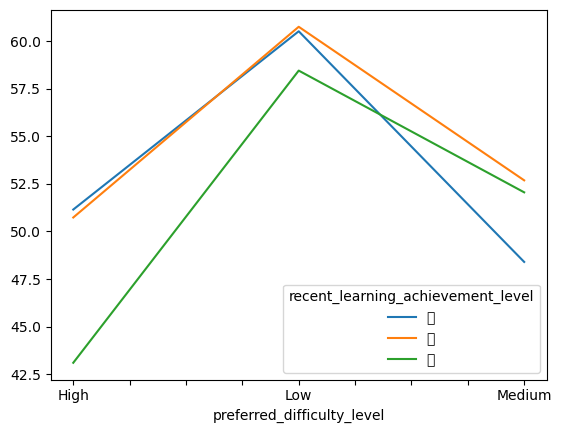

In [55]:
preferred_achievement_table.plot() # 히트맵 그리기

In [45]:
learning_level.groupby('preferred_difficulty_level')['total_completed_courses'].sum()

preferred_difficulty_level
High      22404
Low       66251
Medium    33620
Name: total_completed_courses, dtype: int64

In [48]:
learning_level.groupby('preferred_difficulty_level')['target'].sum()

preferred_difficulty_level
High      1241
Low       3047
Medium    1911
Name: target, dtype: int64

In [50]:
learning_level.groupby('preferred_difficulty_level')['average_time_per_learning_session'].mean()

preferred_difficulty_level
High      48.361022
Low       59.896421
Medium    51.014704
Name: average_time_per_learning_session, dtype: float64

In [58]:
learning_level.groupby('preferred_difficulty_level')['abandoned_learning_sessions'].sum()

preferred_difficulty_level
High       5939
Low       15370
Medium     9127
Name: abandoned_learning_sessions, dtype: int64

선호 난이도가 낮을수록 완료한 총 코스 수도 많고, 다음 달에 구독할 가능성도 높고, 각 학습 세션에 소요된 평균 시간도 높지만, 중단된 학습 세션 수도 높은 것을 알 수 있다.  
- 선호 난이도가 낮아서 진입 장벽이 낮은 난이도의 학습을 선택하여 코스를 완주하지만 도중에 중단하는 경우도 많다.